# DBSCAN (Density=Based Spatial Clustering of Application with Noise)
- 밀도 기반(데이터포인트의 간격) 군집 알고리즘

![](https://d.pr/i/Re9qoB+)

![](https://d.pr/i/T3srVy+)

![](https://d.pr/i/tiIr6K+)

**장점**
- 비구형 클러스터 탐지
- 노이즈 데이터 처리
- 비지도 학습 (클러스터 개수를 사전에 알 필요가 없음)

**단점**
- 데이터 밀도가 자주 변하거나 아예 변하지 않으면 군집화 성능 저하
- 특성 개수가 많으면 군집화 성능 저하 (고차원 데이터에서의 밀도 불균형)
- 매개변수 민감성

In [ ]:
KMeans 군집화의 경우, Noise에 민감하다.
DBSCAN 군집화의 경우, 데이터 밀도가 자주 변하거나 아예 변하지 않으면 군집화 성능 저하 **중요한 특성**
특성 개수가 많다 = 차원이 높다 = 데이터 밀도가 적다 = 군집화 성능 저하
우리가 해야하는 것, 데이터 분포를 파악하고 최대성능을 낼 수 있는 군집화를 찾는다.

Core Point : 중심점
Border Point : 중심점에서 일정 거리 이상 떨어진 점
Noise : 중심점도 아니고 경계점도 아닌 점

SyntaxError: invalid syntax (3205302196.py, line 1)

In [3]:
from sklearn.datasets import make_moons # 지도학습 데이터 생성, 고정형 데이터 생성, 0,1 label 로 분류
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

make_moons(n_samples=300, noise=0.1, random_state=42)

(array([[ 6.82988224e-01, -3.45203344e-01],
        [ 2.04099043e+00, -1.31614674e-01],
        [-1.39751545e-01,  4.54390502e-01],
        [ 8.85747852e-01,  2.86341827e-01],
        [ 1.18245853e+00, -4.97710508e-01],
        [ 1.01920826e+00, -4.25465834e-01],
        [ 3.89361586e-01, -2.47117226e-01],
        [-5.60384576e-01,  7.12681100e-01],
        [ 9.01843523e-01,  5.39308727e-02],
        [ 2.06747907e-01,  6.20769309e-03],
        [ 1.32352331e+00, -2.89175832e-01],
        [ 3.83758712e-01,  8.51802379e-01],
        [ 9.69121626e-01, -4.85487343e-01],
        [ 6.69900924e-01,  9.19338590e-01],
        [ 1.23207593e-01,  1.35338991e-02],
        [ 1.01678336e+00, -5.57668763e-01],
        [ 2.00829930e+00,  3.16434346e-01],
        [ 7.21580319e-01, -3.72571143e-01],
        [-8.56042097e-01,  2.18135896e-02],
        [ 1.82685277e-01,  2.87798699e-01],
        [-5.04992232e-02,  1.01489642e+00],
        [-8.40751844e-01,  5.38150274e-01],
        [ 1.51040341e+00, -4.551

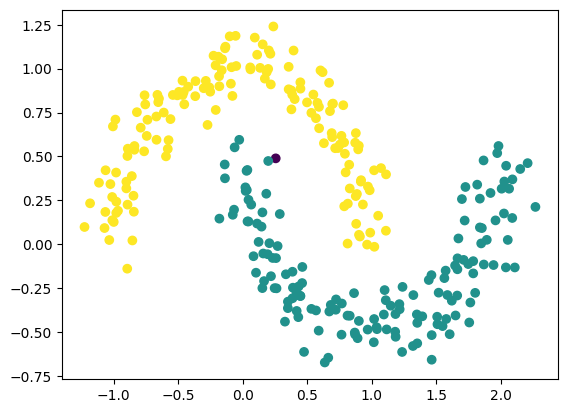

In [ ]:
# 반달형 데이터 생성
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42) # cluster 하기 위해서 X, _ 형태로 데이터 생성

dbscan = DBSCAN(eps=0.2142, min_samples=6) # eps : 데이터 포인트 간의 거리, min_samples : 최소 데이터 포인트 수
dbscan.fit(X) # 클러스터 계산

# eps(이웃 정의 거리 반지름, 0.5) → 기본값
# min_samples(minPts, 5) → 기본값

plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_ , marker='o')
plt.show()

In [ ]:
import numpy as np

np.unique(dbscan.labels_, return_counts=True)
# (array([-1,  0,  1]), array([  1, 149, 150])) → -1은 노이즈, 0은 첫번째 클러스터, 1은 두번째 클러스터
# 노이즈 데이터 1개, 첫번째 클러스터 149개, 두번째 클러스터 150개

(array([-1,  0,  1]), array([  1, 149, 150]))

In [32]:
dbscan.components_

array([[ 6.82988224e-01, -3.45203344e-01],
       [-1.39751545e-01,  4.54390502e-01],
       [ 8.85747852e-01,  2.86341827e-01],
       [ 1.18245853e+00, -4.97710508e-01],
       [ 1.01920826e+00, -4.25465834e-01],
       [ 3.89361586e-01, -2.47117226e-01],
       [-5.60384576e-01,  7.12681100e-01],
       [ 9.01843523e-01,  5.39308727e-02],
       [ 2.06747907e-01,  6.20769309e-03],
       [ 1.32352331e+00, -2.89175832e-01],
       [ 3.83758712e-01,  8.51802379e-01],
       [ 9.69121626e-01, -4.85487343e-01],
       [ 6.69900924e-01,  9.19338590e-01],
       [ 1.23207593e-01,  1.35338991e-02],
       [ 1.01678336e+00, -5.57668763e-01],
       [ 2.00829930e+00,  3.16434346e-01],
       [ 7.21580319e-01, -3.72571143e-01],
       [-8.56042097e-01,  2.18135896e-02],
       [ 1.82685277e-01,  2.87798699e-01],
       [-5.04992232e-02,  1.01489642e+00],
       [-8.40751844e-01,  5.38150274e-01],
       [ 1.51040341e+00, -4.55110964e-01],
       [ 1.50815974e+00, -4.12378184e-01],
       [-7.

In [31]:
dbscan.core_sample_indices_

array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  98,  99, 100, 101, 102, 103, 104, 105,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 18

### iris 데이터셋에 DBSCAN 적용

In [34]:
from sklearn.datasets import load_iris
import pandas as pd

iris_data = load_iris()

iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target

In [ ]:
# DBSCAN 적용
dbscan = DBSCAN(eps=0.6, min_samples=4)
dbscan.fit_predict(iris_data.data) # dbscan은 transform, predict 메서드가 없음 → fit_predict 메서드만 존재
# 왜? 데이터가 늘어날 때마다 모든 데이터에 대해 클러스터 계산하면 너무 오래 걸림